Christina Raffelsberger (11776607), Benedikt Landgraf (11774111)


# SOM 60x40: Wine Quality

All Jupyter Notebooks are published at the following link: [https://github.com/landgrafb98/SOM_22_Coding_Topic_G_Demo_DataCombo-3](https://github.com/landgrafb98/SOM_22_Coding_Topic_G_Demo_DataCombo-3).

In [50]:

import sys
sys.path.append("C:\\Users\\PC\\Documents\\Master Data Science - Kopie\\SOS\\SOM_22_Coding_Topic_G_Demo_DataCombo-3\\.venv\\Lib\\site-packages\\PySOMVis")
from PySOMVis.pysomvis import PySOMVis
from PySOMVis.minisom import MiniSom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import holoviews as hv
from scipy.ndimage import zoom
import math
import json


# Data Exploration and Pre-processing

In [34]:
red_wine = pd.read_csv(
    "datasets/wine+quality/winequality-red.csv", 
    sep=";"
)# Inspect the dataset
print(red_wine.info())  # Display columns and types
print(red_wine.head())  # Display first few rows
print(red_wine.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

In [35]:
white_wine = pd.read_csv(
    "datasets/wine+quality/winequality-white.csv", 
    sep=";"
)# Inspect the dataset
print(white_wine.info())  # Display columns and types
print(white_wine.head())  # Display first few rows
print(white_wine.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         

Since both datasets have the same columns we will join them and add red or white as a new column

In [36]:
red_wine["type"] = 1
print(red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     1  
1      9.8        5     1  
2 

In [37]:
white_wine["type"] = 0
print(white_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  type  
0      8.8        6     0  
1      9.5        6     0  
2 

In [38]:
wine = pd.concat([red_wine, white_wine], ignore_index=True)
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


In [39]:


# Identify target, time and features
target = wine["quality"]
features = wine.drop(columns=["quality"])

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

In [40]:
# Check for missing values
print("Missing values per column:")
print(red_wine.isnull().sum())

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [41]:
# Summarize numerical features
print("Numerical feature summary:")
print(features.describe())

Numerical feature summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000   

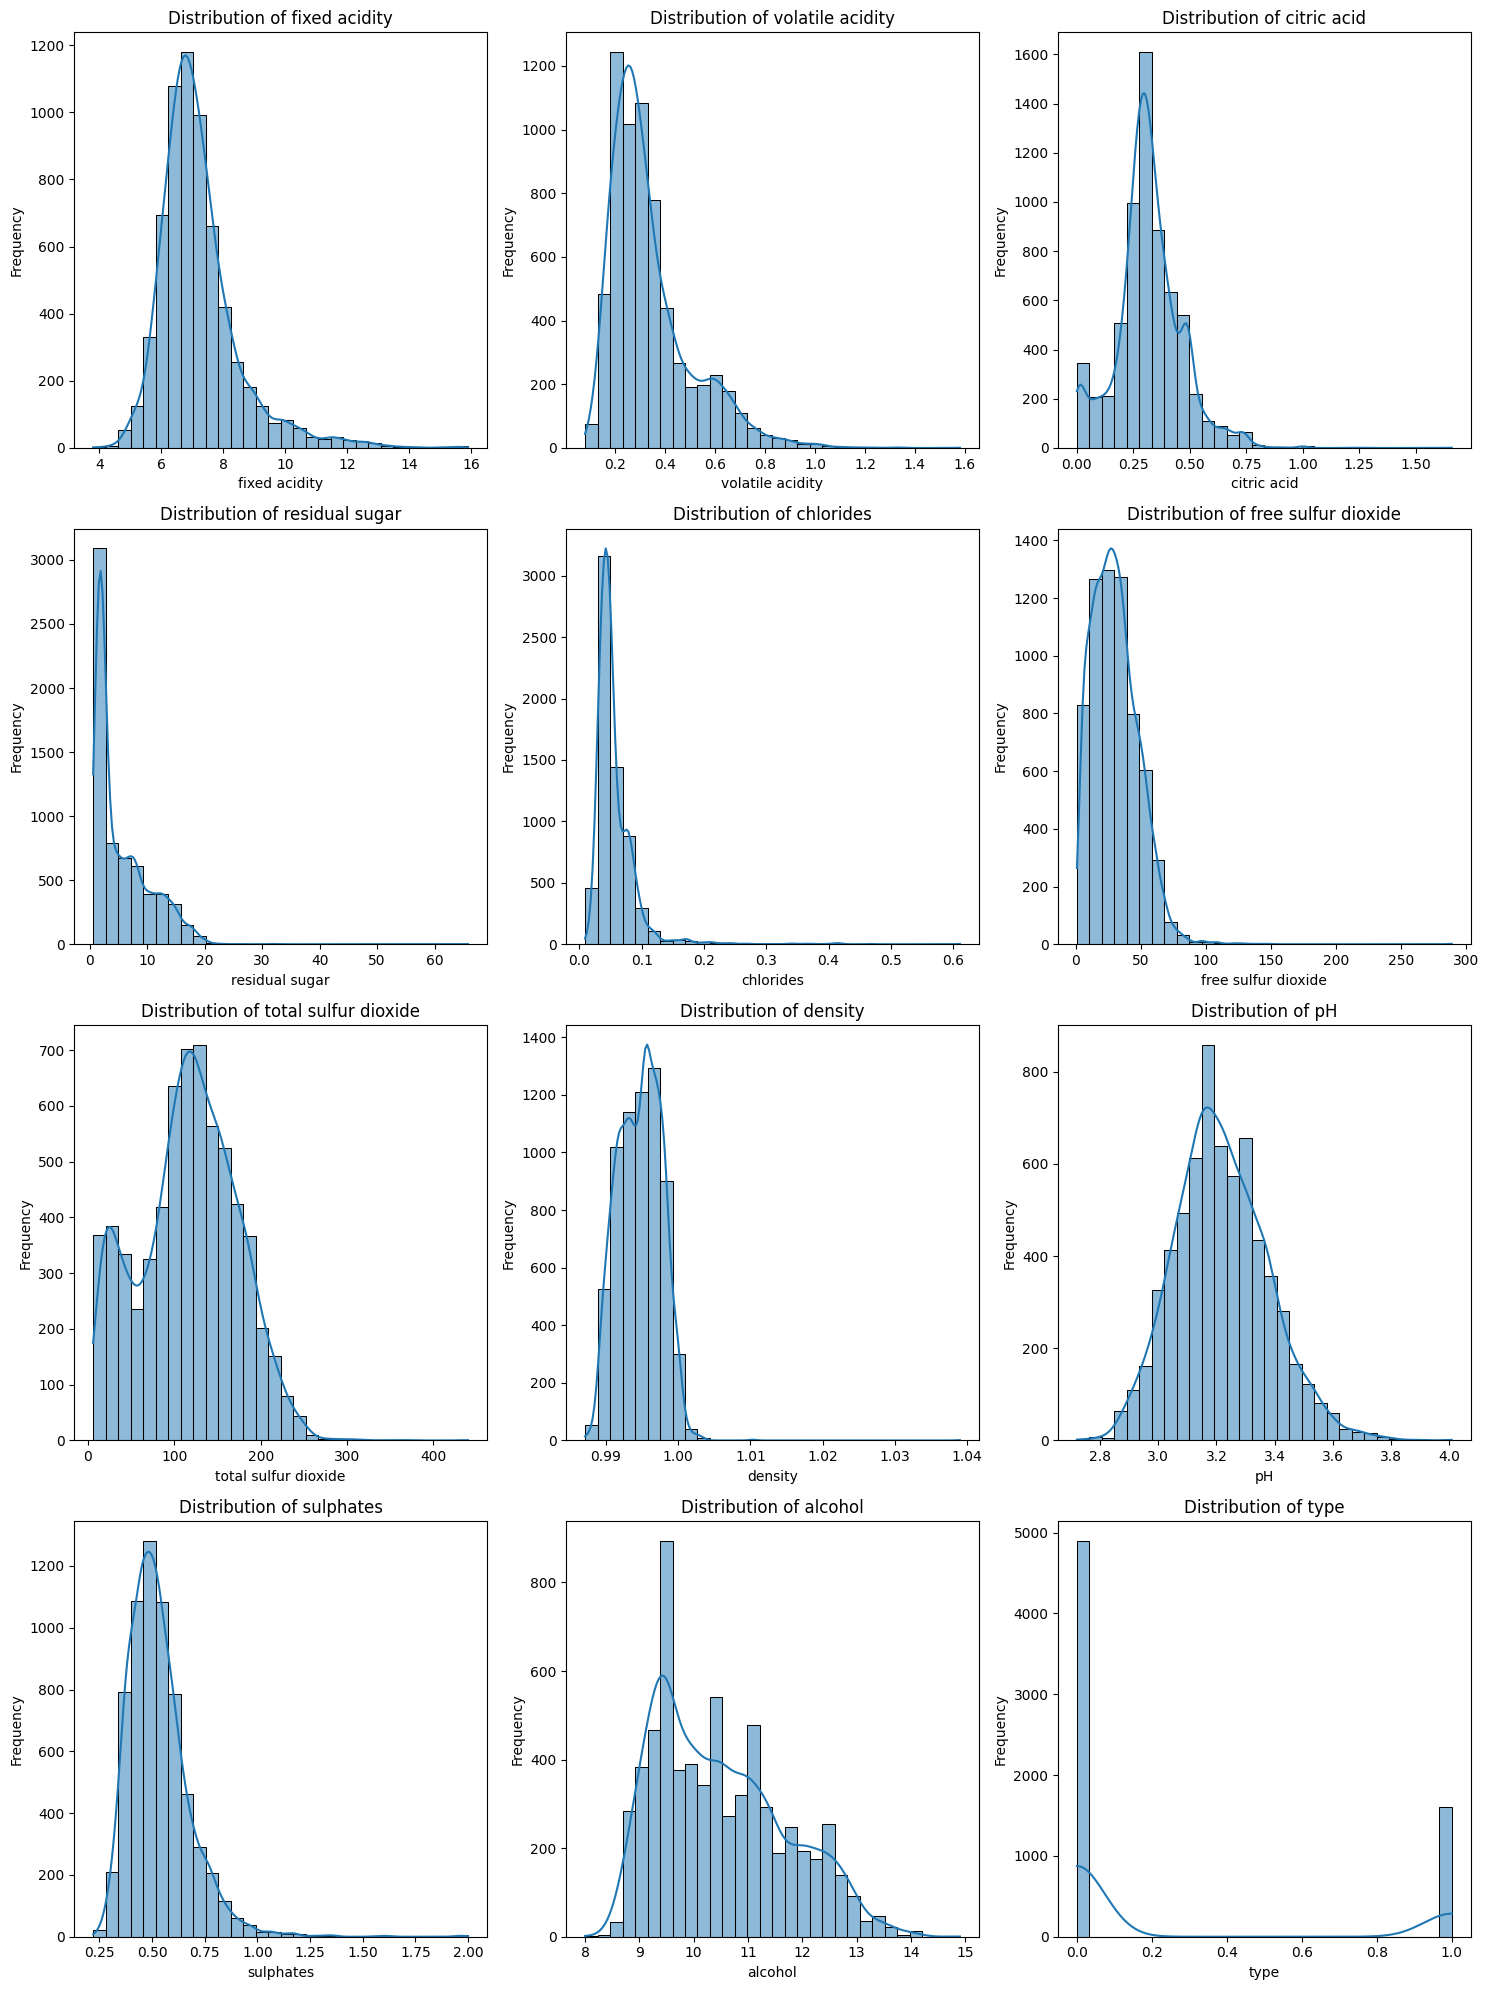

In [42]:
# Determine the number of columns
num_cols = len(features.columns)

# Calculate the number of rows and columns for subplots
num_rows = math.ceil(num_cols / 3)  # 3 columns per row

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Convert to 1D array for easier iteration

for i, column in enumerate(features.columns):
    sns.histplot(features[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Remove unnecessary subplots if needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

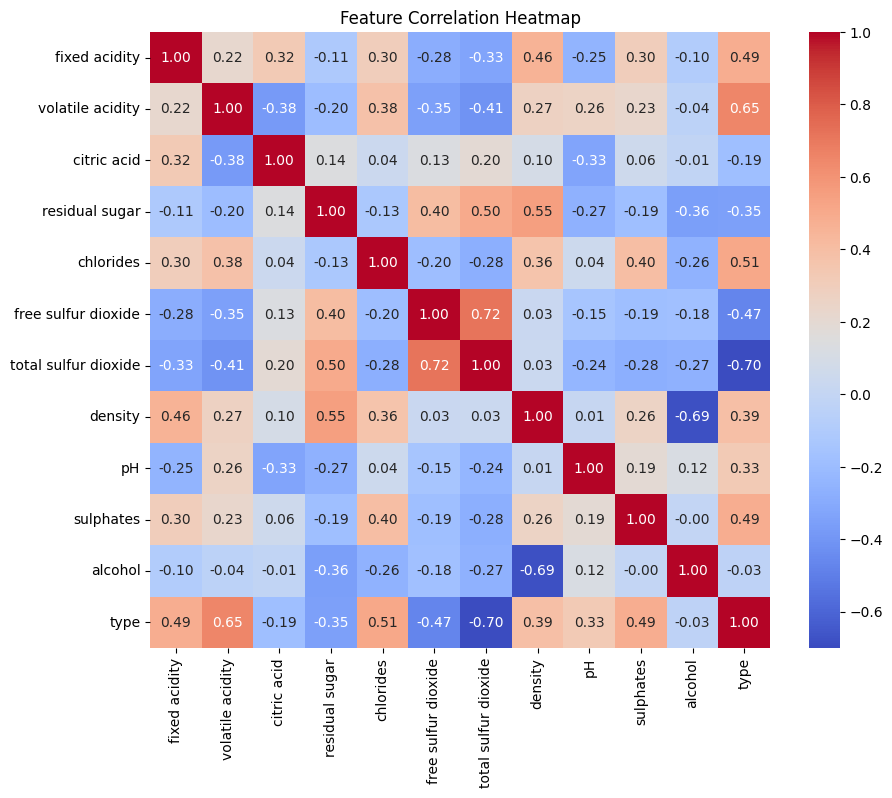

In [43]:
# Check correlations between numerical features
correlation_matrix = features.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [44]:
# Identify features to drop
threshold = 0.85
to_drop = set()
for i in correlation_matrix.columns:
    if i not in to_drop:
        for j in correlation_matrix.columns:
            if i != j and abs(correlation_matrix.loc[i, j]) > threshold and j not in to_drop:
                to_drop.add(j)

# Drop the redundant features
features_scaled_reduced = features_scaled.drop(columns=list(to_drop))
features_reduced = features.drop(columns=list(to_drop))
print(to_drop)

set()


# SOM

First, the SOM is trained with dimensions of 60x40. For this, the minisom library is used, which is included in PySOMVis.

In [45]:
# Train the SOM
# Train the SOM
small_som = MiniSom(x=60, y=40, input_len=features_scaled.shape[1], sigma=1.0, learning_rate=0.5)
small_som.train(features_scaled.values, num_iteration=1000)

## Export Model Metadata

For the quantization error we need numpy instead of pandas format.

In [48]:
import numpy as np

# Convert to NumPy array (if it's a DataFrame)
if hasattr(features_scaled, "to_numpy"):
    features_scaled = features_scaled.to_numpy()

# Ensure it's a float array
features_scaled = features_scaled.astype(np.float64)

# Compute quantization error
quantization_error = small_som.quantization_error(features_scaled)
print("Quantization Error:", quantization_error)

Quantization Error: 1.9547151116272012


In [51]:


# Training dataset file
training_data_file = "https://archive.ics.uci.edu/ml/datasets/Wine+Quality"


# FAIR4ML metadata
fair4ml_metadata = {
    "@context": "https://rdafair4ml.github.io/FAIR4ML-schema/release/0.1.0/context.jsonld",
    "@type": "Model",
    "name": "Self-Organizing Map",
    "algorithm": "MiniSOM",
    "hyperparameters": {
        "grid_size": (60, 40),
        "input_len": features_scaled.shape[1],
        "sigma": "1.0",
        "learning_rate": "0.5"
    },
    "trainingData": training_data_file,
    "evaluationMetrics": {
        "quantization_error": quantization_error
    },
    "dependencies": {
        "PySOMVis": "0.0.1" # Ensure you have a version attribute
    }
}

# Save to JSON-LD file
with open("wine60x40_fair4ml.jsonld", "w") as f:
    json.dump(fair4ml_metadata, f, indent=4)

print("Model exported to minisom_fair4ml.jsonld")

Model exported to minisom_fair4ml.jsonld


Export the model metadata:

Next, the interactive visualization from PySOMVis is generated. This includes all visualizations from the library and is primarily used to verify the accuracy of the subsequent custom visualizations. The code used to create the custom visualizations is based on the code from PySOMVis.

In [14]:
som_vis = PySOMVis(weights=small_som.get_weights(), input_data=features_scaled.values, classes=target.values)

# Attempt to manually set the parameter if accessible
#som_vis.radius = 1.0  # Replace with a valid numeric value
som_vis._mainview



BokehModel(combine_events=True, render_bundle={'docs_json': {'86565826-3c70-411b-9623-2bc3e762ee9f': {'version…

# Density

## HIT Histogram

A Hit Histogram in the context of Self-Organizing Maps (SOMs) is a visualization that shows how often data points are assigned to specific nodes in the SOM grid. Each node in the grid represents a prototype vector, which summarizes the characteristics of the data points closest to it. In a hit histogram, the "hits" reflect the number of data points mapped to a particular node, with color intensity representing the hit count. Bright or warm colors (e.g., red) indicate many hits, while dark or cool colors (e.g., blue) indicate fewer or no hits. This visualization provides insights into the distribution and density of data points across the feature space, helping to identify clusters, sparse regions, and potential outliers.

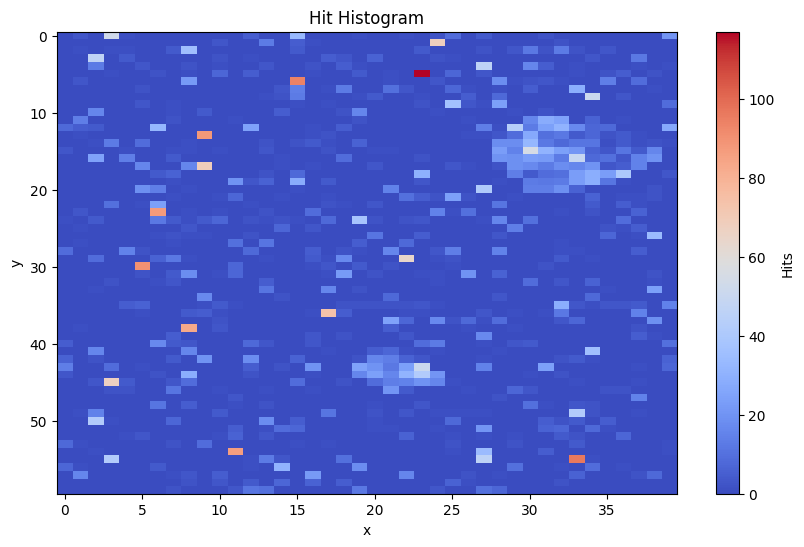

In [15]:
weights = som_vis._weights
input_data = som_vis._idata
m, n = som_vis._m, som_vis._n

hist = np.zeros(m * n)
for vector in input_data: 
    position = np.argmin(np.sqrt(np.sum(np.power(weights - vector, 2), axis=1)))
    hist[position] += 1

hit_hist_data = hist.reshape(m, n)

plt.figure(figsize=(10, 6))
plt.imshow(hit_hist_data, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Hits')
plt.title('Hit Histogram')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This hit histogram reveals several important patterns. First, there is a high-density region with a bright red area, indicating a cluster of many data points. This suggests that this part of the SOM grid represents a common pattern or frequently occurring combination of features in the dataset. In contrast, large portions of the grid appear dark or lightly colored, indicating regions with very few or no hits. 
Also there are two clusters of light regions in the bottom part of the grid which indicate some patterns in this area.

### Smoothed Data Histograms
An SDH (Smoothed Data Histogram) visualization is an advanced representation of how data points are distributed across the nodes of a Self-Organizing Map (SOM). Unlike a standard hit histogram that simply counts how many data points map to each node, an SDH smooths these counts by considering the influence of neighboring nodes. The level of smoothing is controlled by a factor (e.g., how many neighboring nodes are included in the computation). This provides a more nuanced view of the data distribution, reducing noise and highlighting general trends or patterns. There are 3 different approaches:
* Type 0 (Normalized Smoothing): Contributions are weighted by their rank (closer nodes contribute more than distant ones), normalized by the smooth factor.
* Type 1 (Distance-Based Smoothing): Contributions are weighted based on the inverse of the distance to the node.
* Type 2 (Min-Max Normalized Distance): Contributions are based on normalized distances within the closest nodes, emphasizing relative proximity.

In [16]:
def custom_sdh(factor, approach, ax=None):
    sdh = som_vis._visualizations[5]
    sdh_data = sdh.sdh(weights, m, n, input_data, factor, approach)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))  # Create figure only if no axis is provided
    
    im = ax.imshow(sdh_data, cmap='coolwarm', aspect='auto')
    ax.set_title(f'SDH: Factor {factor}, Approach {approach}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Add colorbar only if a standalone figure was created
    if ax is None:
        plt.colorbar(im, ax=ax)
        plt.show()

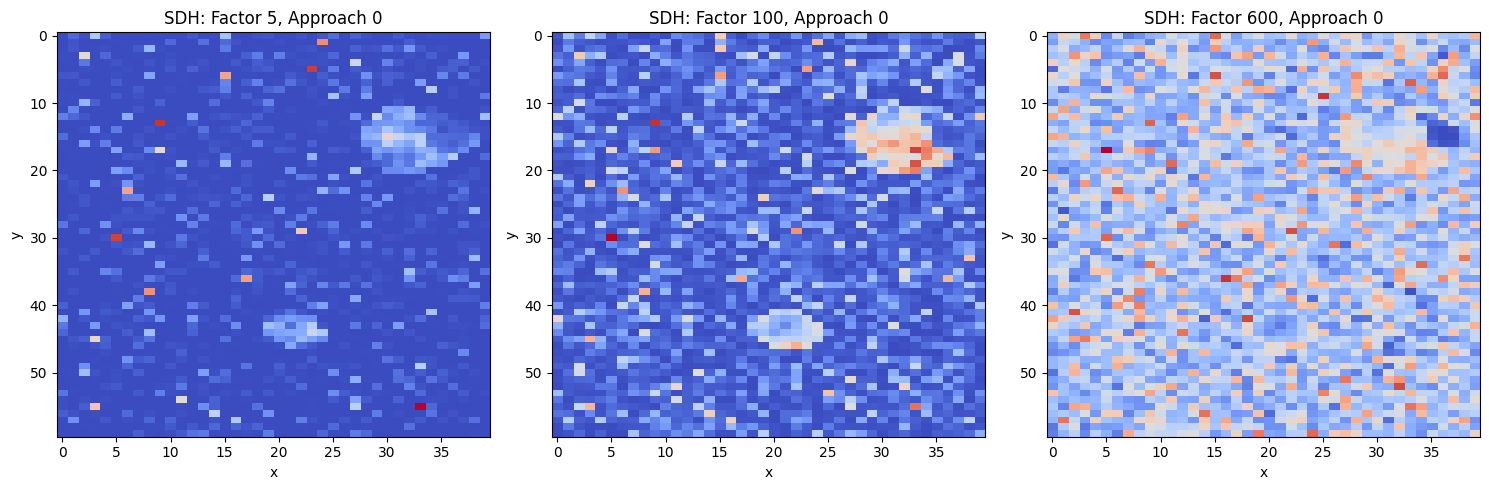

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots

for ax, i in zip(axes, [5, 100, 600]):
    custom_sdh(i, 0, ax=ax)  # Pass each subplot to `custom_sdh`

plt.tight_layout()
plt.show()

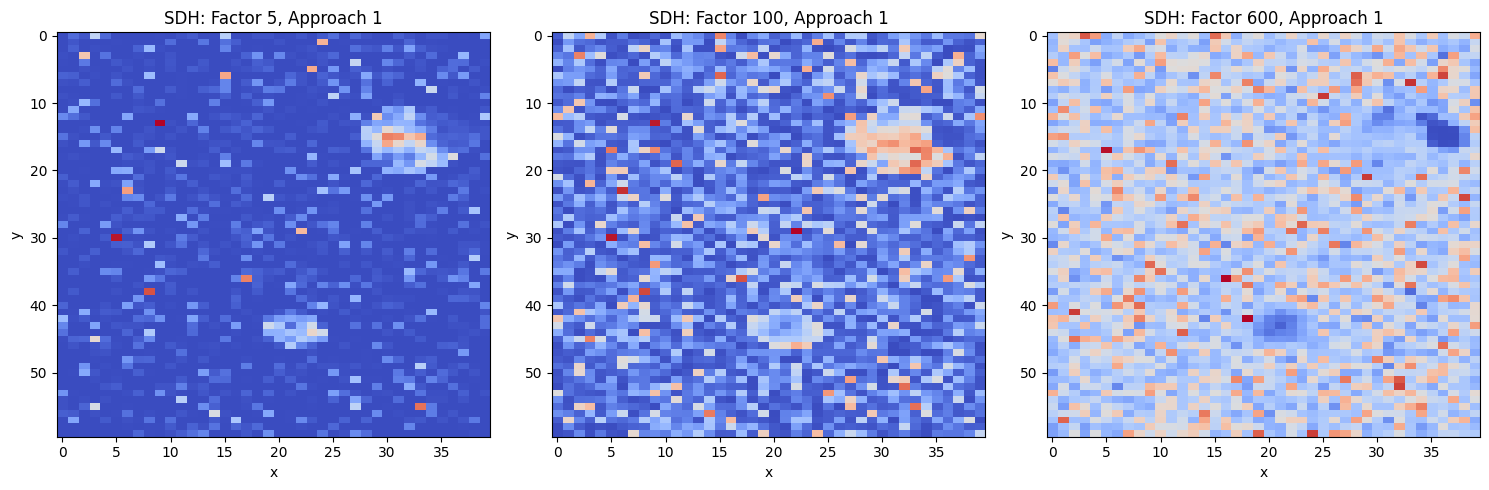

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots

for ax, i in zip(axes, [5, 100, 600]):
    custom_sdh(i, 1, ax=ax)  # Pass each subplot to `custom_sdh`

plt.tight_layout()
plt.show()

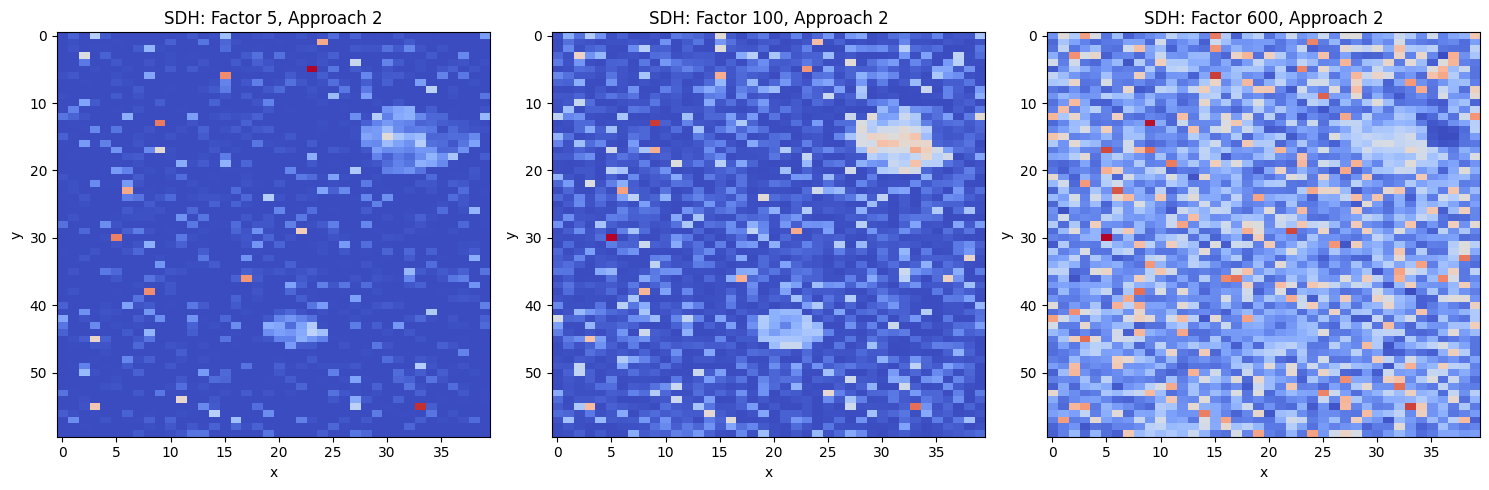

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots

for ax, i in zip(axes, [5, 100, 600]):
    custom_sdh(i, 2, ax=ax)  # Pass each subplot to `custom_sdh`

plt.tight_layout()
plt.show()

We can see that the different approaches intensifiy the high density areas differently. For example in approach 2 (Min-Max Normalized Distance) we get a dark red patch at the top but lower density bottoms in the cluster at the bottom.
Also for the factors we can see that the low factor of 5 is very similar to the Hit Histogram abbove having a lot of sparse areas. The higher the factor the denser plot gets. But also we can see for the very high factor the clusters disappear within the noise.
The two clusters most likely represent the two types of wine.

# P-Matrix
The P-Matrix visualization is a method for analyzing the density of data points in the feature space around each node in a Self-Organizing Map (SOM). Instead of focusing solely on the direct hits or contributions (as with Hit Histograms or SDH), the P-Matrix considers a radius-based neighborhood around each SOM node and calculates how many data points fall within that radius.

In [20]:
def custom_p_matrix(radius_values):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Creates a 2x2 grid
    axes = axes.flatten()  # Flatten to easily iterate
    
    for i, radius in enumerate(radius_values):
        distance = lambda v: np.sum(np.linalg.norm(input_data[:, None, :] - v, axis=-1) < radius)
        p_matrix_data = np.array([distance(v) for v in weights])
        p_matrix_data = p_matrix_data.reshape(m, n)

        ax = axes[i]
        im = ax.imshow(p_matrix_data, cmap='coolwarm', aspect='auto')
        ax.set_title(f'P-Matrix: Radius {radius}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        
        # Add colorbar to each subplot
        fig.colorbar(im, ax=ax)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

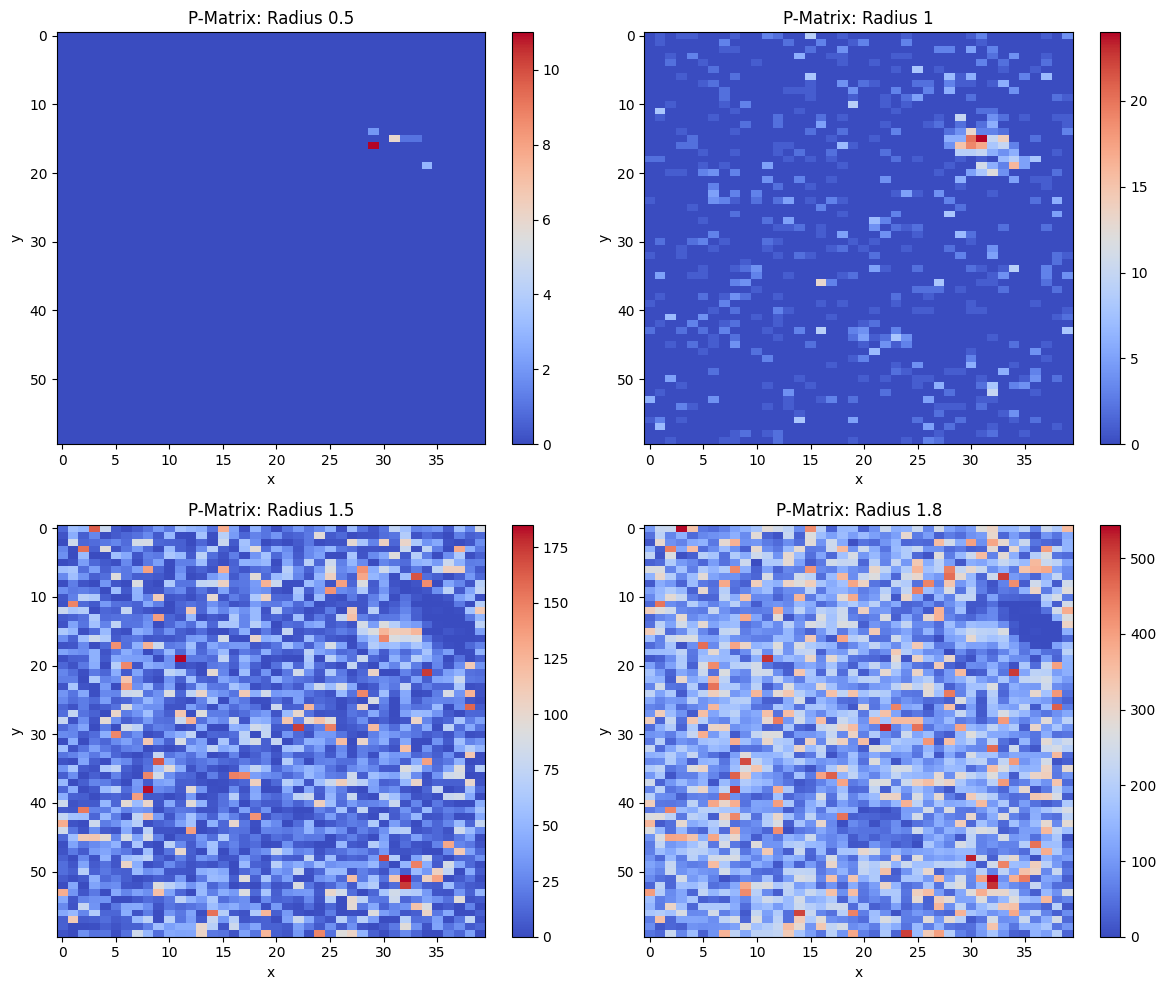

In [21]:
# Call the function with the radius values
radius_list = [0.5, 1, 1.5, 1.8]
custom_p_matrix(radius_list)

Similar to SHD with small factor we can see that the P-Matrix with small radius is very sparse compared to P-Matrices with bigger radii. 
When using radius 1.8 we can see that clusters remain, but they are clusters of low density instead of clusters of higher density. 

Also the clusters are differently placed then they were for the SDH visualizations.

### Sky Metaphor

The Sky Metaphor Visualization projects high-dimensional data onto a 2D plane, using an SDH (Smoothed Data Histogram) as the background to highlight density patterns, with bright areas indicating clusters and dark areas showing sparsity. Data points are positioned based on their proximity to SOM nodes and influenced by neighboring nodes, with the pull force controlling the balance between local and global influences. This visualization effectively reveals dense clusters, scattered patterns, and outliers, offering a clear view of the dataset's structure.

#### Smoothing factor: 5, Pull Force: 0.25

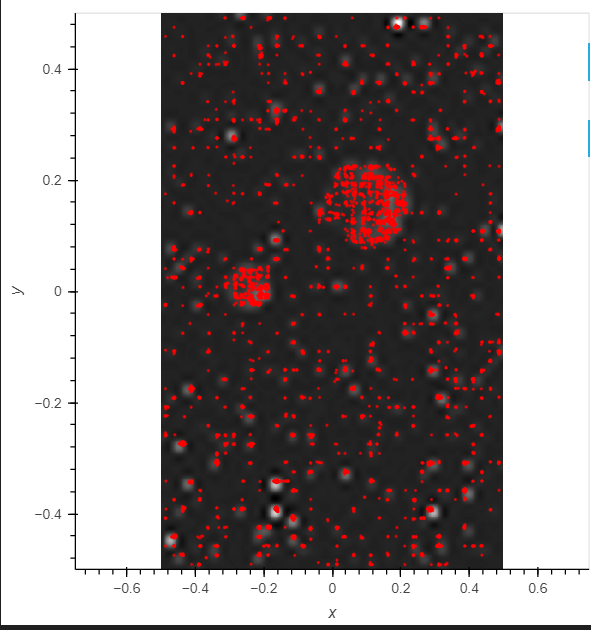

#### Smoothing factor: 10, Pull Force: 0.25

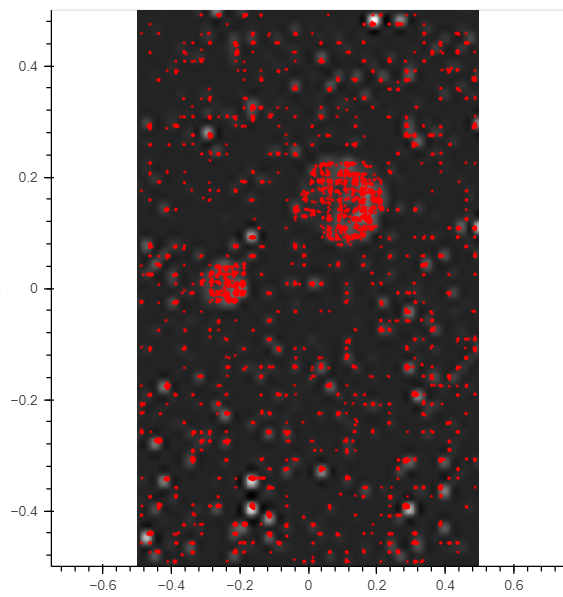

#### Smoothing factor: 20, Pull Force: 0.25

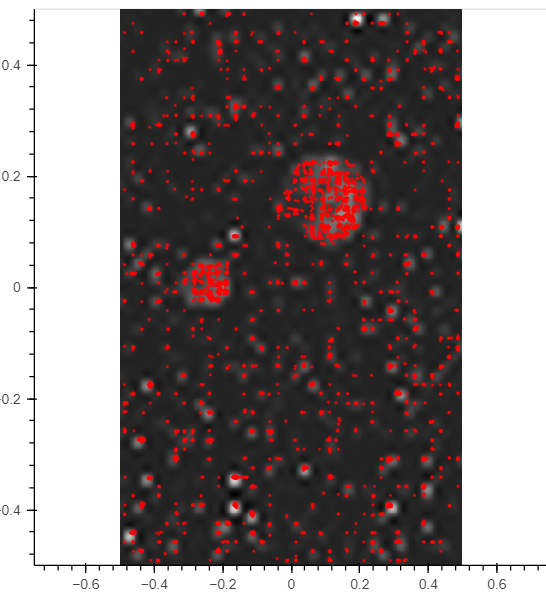

#### Smoothing factor: 10, Pull Force: 0.1

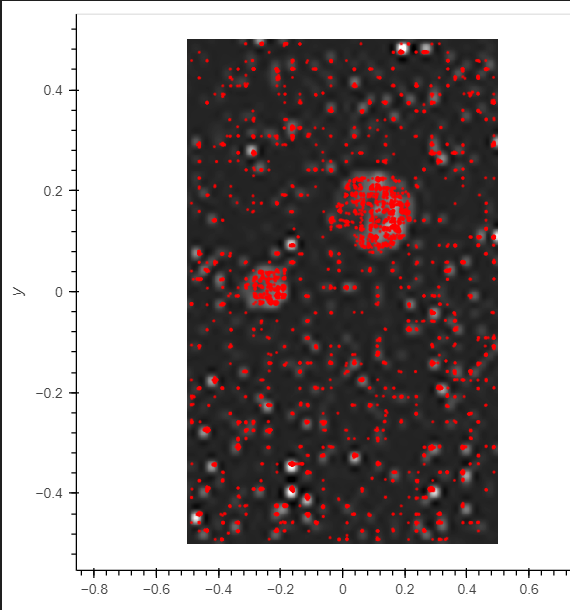

We can not see any difference when using the different parameters for Sky Metaphor. Either the Interface does not update correctly when we change the values or they do not make much difference in generell.

Nevertheless the clusters are shown very clearly. 

## Distances
### Activity Histogram

An Activity Histogram visualizes the activation levels of all nodes in a Self-Organizing Map (SOM) for a specific data point. It shows how strongly each SOM node responds to the given data point by calculating the distance between the data point and the weight vector of each node. Smaller distances indicate higher similarity, meaning the node is more "activated" by the input data.

C:\Users\PC\AppData\Local\Temp\ipykernel_8724\2013603356.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust plot area to 90% width to leave space for color bar


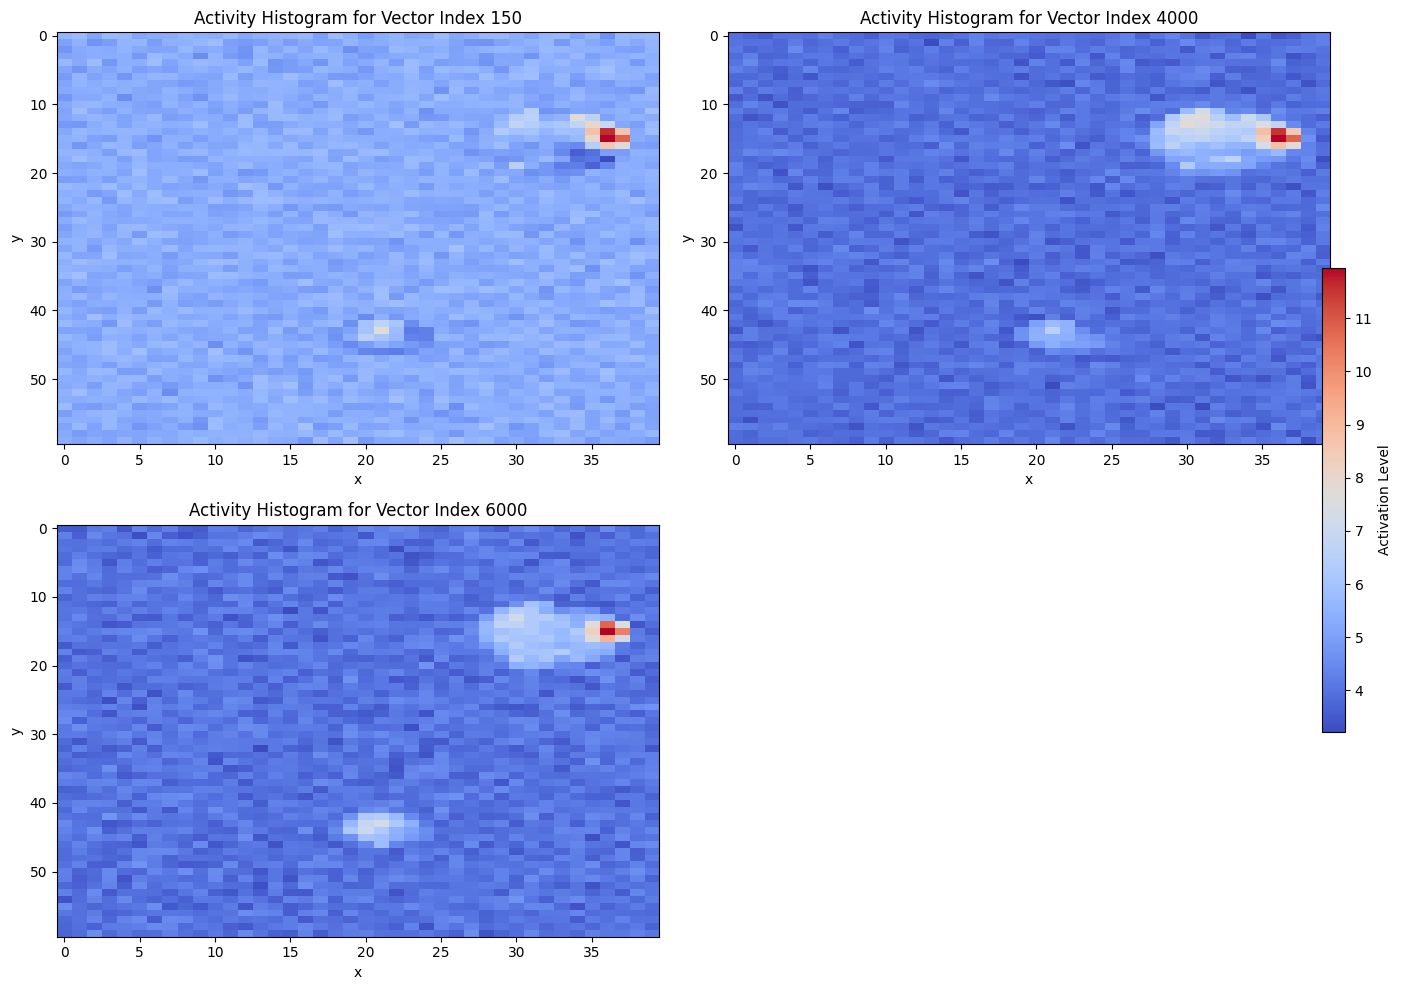

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def custom_act_hist(vec_idx, ax):
    vector = input_data[vec_idx]
    act_hist_data = np.linalg.norm(weights - vector, axis=1)
    act_hist_data = act_hist_data.reshape(m, n)
    
    im = ax.imshow(act_hist_data, cmap='coolwarm', aspect='auto')
    ax.set_title(f'Activity Histogram for Vector Index {vec_idx}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return im

# Indices to visualize
indices = [150, 4000, 6000]

# Set up the grid of plots: 2 columns, 2 rows
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Flatten axs array to easily iterate through for each plot
axs = axs.flatten()

# Loop through indices and generate histograms
for i, vec_idx in enumerate(indices):
    im = custom_act_hist(vec_idx, axs[i])

# Hide the last empty subplot if there's no fourth plot
axs[len(indices)].axis('off')

# Add the color bar for the entire figure, placed on the far right side
fig.colorbar(im, ax=axs, orientation='vertical', label='Activation Level', fraction=0.02, pad=0.04)

# Adjust layout to make space for the color bar
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust plot area to 90% width to leave space for color bar

plt.show()







The activity vector seem to have been very similar, although they are far apart. On Index 150 the whole graph is a bit lighter therefore has a higher activation level than for example on vector 4000. All show 2 clusters with higher activation levels, one even beeing dark red.

### Minimum Spanning Trees

### Cluster Connection

The Cluster Connection Visualization is used to explore the relationships between nodes in a Self-Organizing Map (SOM) based on their weight distances. The distances between neighboring SOM nodes are calculated, representing how similar or dissimilar their weights are. These distances are then visualized as connections (lines) between nodes, with the thickness or opacity of the lines indicating the strength of the connection.

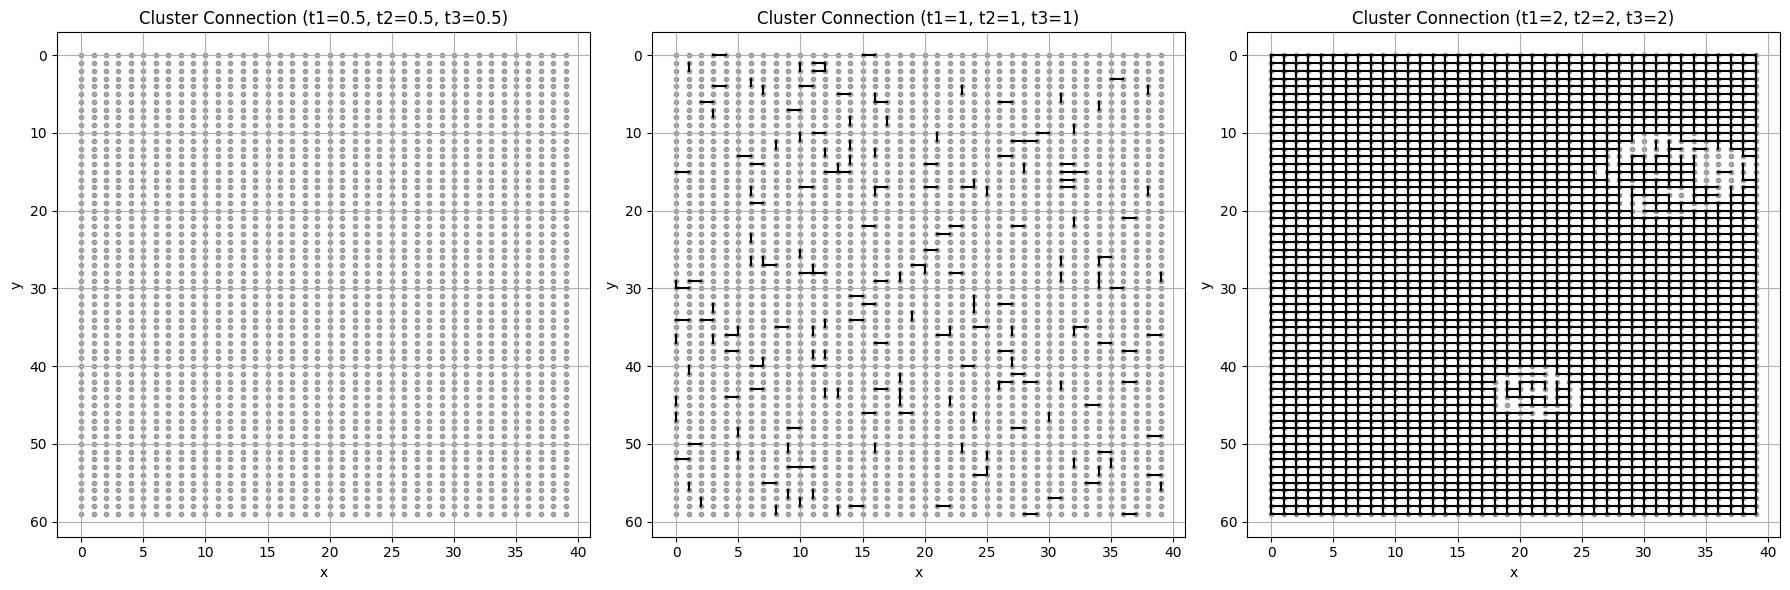

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def calculate_paths(weights, m, n):
    paths = []
    for y in range(m):
        for x in range(n):
            n1 = np.ravel_multi_index((y, x), dims=(m, n))
            if x < n - 1:
                n2 = np.ravel_multi_index((y, x + 1), dims=(m, n))
                w = np.linalg.norm(weights[n1] - weights[n2])
                paths.append([x, y, x + 1, y, w])
            if y < m - 1:
                n2 = np.ravel_multi_index((y + 1, x), dims=(m, n))
                w = np.linalg.norm(weights[n1] - weights[n2])
                paths.append([x, y, x, y + 1, w])
    paths_df = pd.DataFrame(paths, columns=['x0', 'y0', 'x1', 'y1', 'alpha'])
    return paths_df

paths = calculate_paths(weights, m, n)

# Assuming 'paths' is already calculated from the 'calculate_paths' function
# and 'weights', 'm', and 'n' are defined

def custom_cluster_connection(t1, t2, t3, ax):
    t1_mask = paths['alpha'] < t1
    t2_mask = (paths['alpha'] >= t1) & (paths['alpha'] < t2)
    t3_mask = (paths['alpha'] >= t2) & (paths['alpha'] < t3)

    ax.set_title(f"Cluster Connection (t1={t1}, t2={t2}, t3={t3})")

    ax.plot(
        [paths.loc[t1_mask, 'x0'], paths.loc[t1_mask, 'x1']],
        [paths.loc[t1_mask, 'y0'], paths.loc[t1_mask, 'y1']],
        color='black', alpha=1.0, linewidth=1.5
    )

    ax.plot(
        [paths.loc[t2_mask, 'x0'], paths.loc[t2_mask, 'x1']],
        [paths.loc[t2_mask, 'y0'], paths.loc[t2_mask, 'y1']],
        color='black', alpha=0.6, linewidth=1.2
    )

    ax.plot(
        [paths.loc[t3_mask, 'x0'], paths.loc[t3_mask, 'x1']],
        [paths.loc[t3_mask, 'y0'], paths.loc[t3_mask, 'y1']],
        color='black', alpha=0.3, linewidth=1.0
    )

    # Scatter points to represent grid positions
    x_coords = np.arange(int(paths['x0'].max() + 1))
    y_coords = np.arange(int(paths['y0'].max() + 1))
    xx, yy = np.meshgrid(x_coords, y_coords)
    ax.scatter(xx.ravel(), yy.ravel(), color='black', s=10, alpha=0.3)

    ax.invert_yaxis()
    ax.grid(True)
    ax.set_xlabel("x")
    ax.set_ylabel("y")


# Set up the grid of plots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Define the parameters t1, t2, t3 for the three plots
param_sets = [(0.5, 0.5, 0.5), (1, 1, 1), (2, 2, 2)]

# Loop through the parameter sets and plot them in the subplots
for ax, params in zip(axs, param_sets):
    t1, t2, t3 = params
    custom_cluster_connection(t1, t2, t3, ax)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



Making the thresholds higher we can see the clusters again. When they are low, the plot looks very noisy.

### D_Matrix
A D-Matrix (Distance Matrix) is a visualization technique used in Self-Organizing Maps (SOMs) to represent the median distance between the weights of a node and its immediate neighbors. It provides a measure of how similar or dissimilar each node is to the surrounding nodes, making it a useful tool for identifying:
* **Clusters**: Regions with small median distances (low D-Matrix values) represent cohesive clusters where neighboring nodes are highly similar.
* **Cluster Boundaries**: Regions with large median distances (high D-Matrix values) indicate boundaries between clusters, where neighboring nodes are dissimilar.

In [24]:
def calculate_d_matrix(weights, m, n):
    d_matrix = np.zeros(m * n)
    for i in range(m):
        for j in range(n):
            p = i * n + j
            region = []
            if j > 0: region.append(p - 1)  # Left
            if i > 0: region.append(p - n)  # Up
            if j < n - 1: region.append(p + 1)  # Right
            if i < m - 1: region.append(p + n)  # Down
            d_matrix[p] = np.median(np.linalg.norm(weights[region] - weights[p], axis=-1))
    return d_matrix.reshape(m, n)

def custom_d_matrix():
    d_matrix = calculate_d_matrix(weights, m, n)
    plt.figure(figsize=(10, 6))
    plt.title("D-Matrix")
    plt.imshow(d_matrix, cmap="coolwarm", aspect="auto")
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

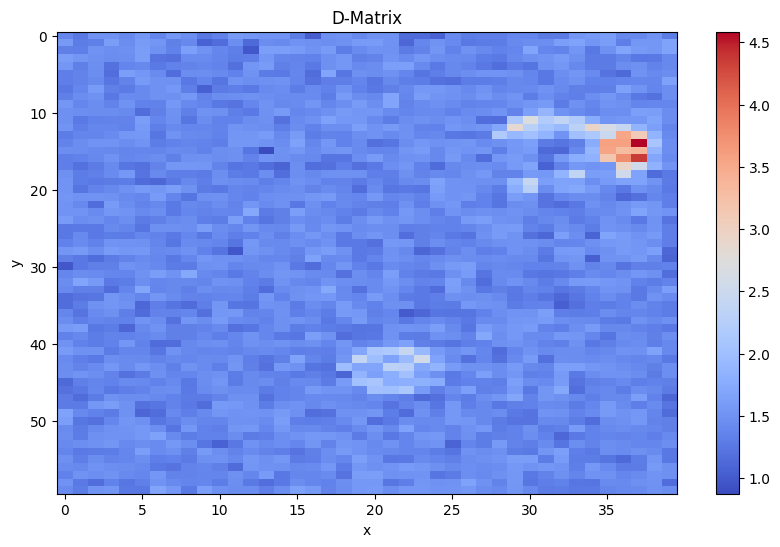

In [25]:
custom_d_matrix()

In most areas the nodes are very similar. But there are two areas were they are less similar.

### U-Matrix

A U-Matrix (Unified Distance Matrix) is a visualization used to represent the distances between neighboring nodes in a SOM.

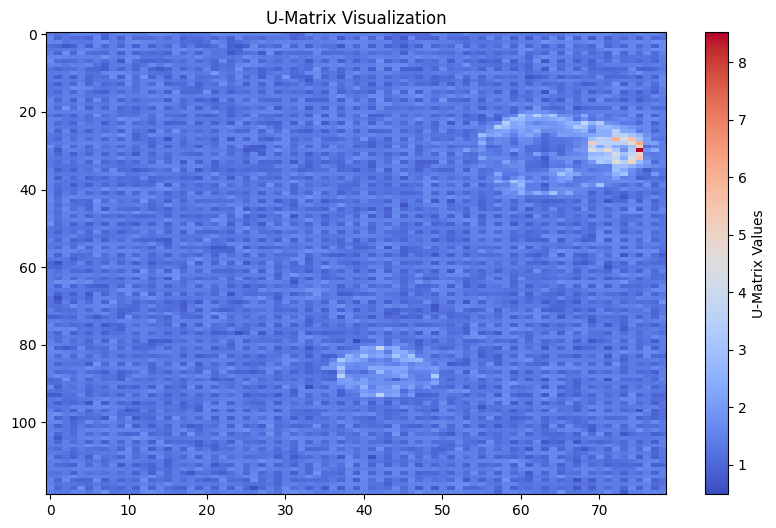

In [26]:
umatrix = som_vis._visualizations[2]
umatrix_data = umatrix.calculate_UMatrix(weights, m, n, som_vis._dim)
plt.figure(figsize=(10, 6))
plt.imshow(umatrix_data, cmap='coolwarm', aspect='auto')
plt.colorbar(label='U-Matrix Values')
plt.title('U-Matrix Visualization')
plt.show()

We can see two areas with oval form contours. These look like they are cluster boundaries

### U*-Matrix

The U-Star Matrix is a variant of the U-Matrix designed to enhance the visualization of local and global structures in the SOM. While the U-Matrix focuses on the average distances between neighboring nodes, the U-Star Matrix calculates the distance between each SOM node and all other nodes within a specified radius.

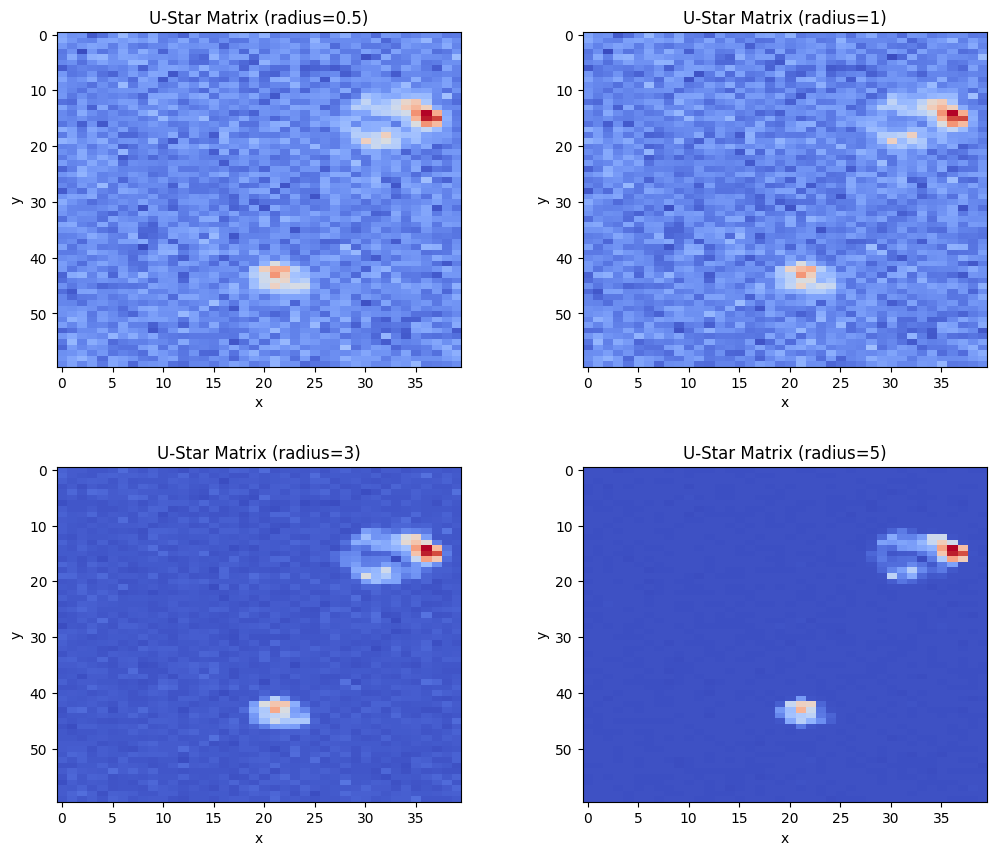

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate U-Star matrix
def calculate_u_matrix(weights, m, n, dim):
    U = weights.reshape(m, n, dim)
    U = np.insert(U, np.arange(1, n), values=0, axis=1)
    U = np.insert(U, np.arange(1, m), values=0, axis=0)
    for i in range(U.shape[0]):
        if i % 2 == 0:
            for j in range(1, U.shape[1], 2):
                U[i, j][0] = np.linalg.norm(U[i, j - 1] - U[i, j + 1], axis=-1)
        else:
            for j in range(U.shape[1]):
                if j % 2 == 0:
                    U[i, j][0] = np.linalg.norm(U[i - 1, j] - U[i + 1, j], axis=-1)
                else:
                    U[i, j][0] = (
                        np.linalg.norm(U[i - 1, j - 1] - U[i + 1, j + 1], axis=-1)
                        + np.linalg.norm(U[i + 1, j - 1] - U[i - 1, j + 1], axis=-1)
                    ) / (2 * np.sqrt(2))
    U = np.sum(U, axis=2)
    return U

# Function to calculate U-Star matrix
def calculate_u_star_matrix(radius):
    distance = lambda v: np.sum(np.linalg.norm(input_data[:, None, :] - v, axis=-1) < radius)
    p_matrix = np.array([distance(v) for v in weights]).reshape(m, n)
    
    u_matrix = calculate_u_matrix(weights, m, n, weights.shape[1])
    u_matrix = u_matrix[::2, ::2].flatten()
    p_matrix_flat = p_matrix.flatten()
    mean_p = np.mean(p_matrix_flat)
    max_p = np.max(p_matrix_flat)
    diff = mean_p - max_p

    ustar_matrix = np.array([
        u_matrix[i] * ((p_matrix_flat[i] - mean_p) / diff + 1)
        for i in range(len(p_matrix_flat))
    ])
    return ustar_matrix.reshape(m, n)

# Function to plot U-Star matrix
def custom_u_star_matrix(radius, ax):
    u_star_data = calculate_u_star_matrix(radius)
    im = ax.imshow(u_star_data, cmap="coolwarm", aspect="auto")
    ax.set_title(f"U-Star Matrix (radius={radius})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    return im

# Define radii
radii = [0.5, 1, 3, 5]

# Create a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Flatten axs array for easy iteration (since it's a 2x2 grid)
axs = axs.flatten()

# Plot each U-Star matrix on the grid
for ax, radius in zip(axs, radii):
    im = custom_u_star_matrix(radius, ax)

# Adjust layout to ensure proper spacing
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()




We can again see the known clusters, but they are especially clear for the very high radius of 5.

## Class Info
### Pie Chart

The Pie Chart Visualization for SOMs represents the distribution of different classes or groups across the nodes in the grid. Each SOM node is associated with a set of data points, and the pie charts visualize the proportion of each class present in the data mapped to that node.

In [28]:
def calculate_pie_chart_data(weights, input_data, classes, m, n, dim):
    grid = m * n
    n_classes = np.unique(classes)
    mapped_data = np.zeros((grid, len(n_classes)))

    bmu = np.apply_along_axis(
        lambda x: np.argmin(np.linalg.norm(weights - x.reshape((1, dim)), axis=1)),
        1,
        input_data,
    )

    for i in range(len(classes)):
        c = np.where(n_classes == classes[i])[0][0]
        u = bmu[i]
        mapped_data[u][c] += 1

    return mapped_data

classes = target.values

def custom_pie_chart(colors, class_labels):
    mapped_data = calculate_pie_chart_data(weights, input_data, classes, m, n, weights.shape[1])
    max_size = np.sum(mapped_data, axis=1).max()
    plt.figure(figsize=(10, 10))
    
    for i in range(m):
        for j in range(n):
            idx = i * n + j
            data = mapped_data[idx]
            total = data.sum()
            if total > 0:
                fractions = data / total
                sizes = fractions * (total / max_size) * 500
                center = (j, i)
                wedges, _ = plt.pie(
                    data,
                    radius=1 / max(m, n)*30,
                    colors=[colors[int(k)] for k in range(len(data))],
                    startangle=90,
                )
                plt.gca().add_artist(plt.Circle(center, 0.25, color="white", zorder=0))
                for w in wedges:
                    w.set_center(center)
    
    legend_handles = [
        plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None', label=label)
        for color, label in zip(colors, class_labels)
    ]
    plt.legend(handles=legend_handles, loc="upper right", bbox_to_anchor=(1.2, 1.0), title="Groups")
    

    plt.xlim(-0.5, n - 0.5)
    plt.ylim(-0.5, m - 0.5)
    #plt.xticks(range(n))
    #plt.yticks(range(m))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.title("Pie Chart")
    plt.show()

In [29]:
np.unique(target)

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

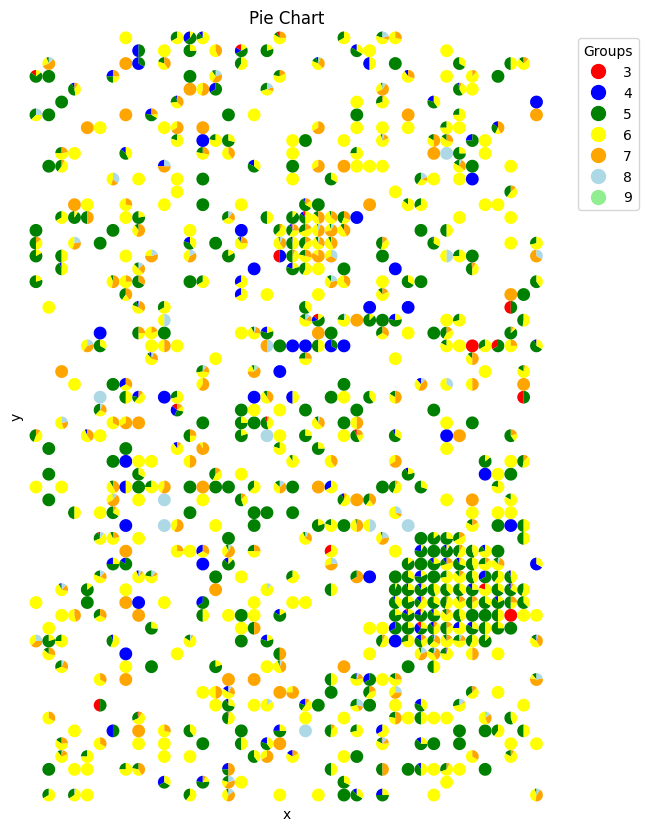

In [30]:
colors = ["red", "blue", "green", "yellow", "orange", "lightblue", "lightgreen"]
custom_pie_chart(colors, np.unique(target))



We can see that there are 2 clusters mainly containing mainly class five and six. But in generell these classes are more prevalent. This is no surprise since it is the middle quality.
But we also note that for seven classes the piecharts are not ideal because it is hard to differentiate 7 colors.

### Chessboard

The Chessboard Paths Visualization is designed to partition a feature space from a SOM into regions, where each region represents a distinct cluster, class, or group. It highlights decision boundaries or transitions between regions based on the underlying data patterns and relationships.

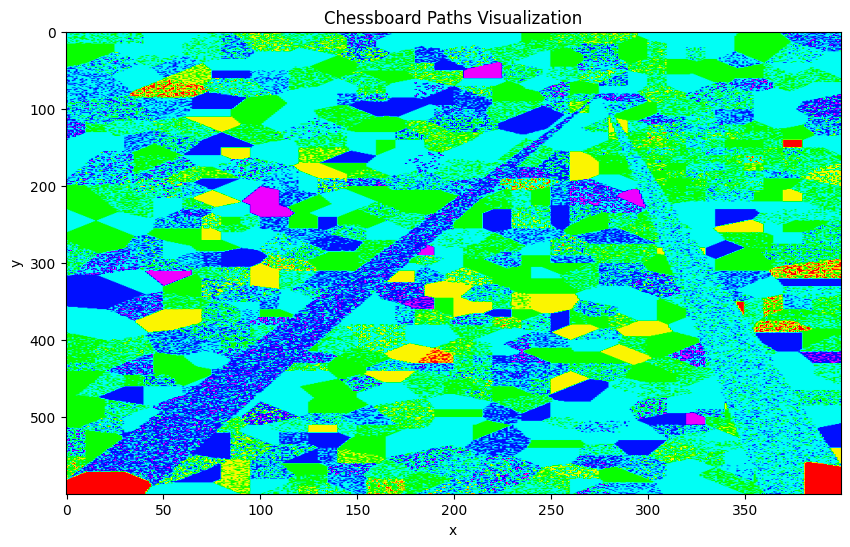

In [31]:
chessboard_plot = som_vis._visualizations[8]
chessboard_plot._calculate()
chessboard_plot_data = chessboard_plot._main._pipe.data

plt.figure(figsize=(10, 6))
plt.title("Chessboard Paths Visualization")
plt.imshow(chessboard_plot_data, cmap="hsv", aspect="auto")

plt.xlabel("x")
plt.ylabel("y")
plt.show()

We can see some clusters but it is harder to find patterns than for most other visualisations.The only thing catching the eye are thw two red patches.

## Attributes
### Component Planes

The Component Plane Visualization is used in SOMs to show how each individual feature (or component) is represented across the grid. Each plane corresponds to a single feature in the dataset and visualizes its activation levels or intensity values across the SOM nodes.

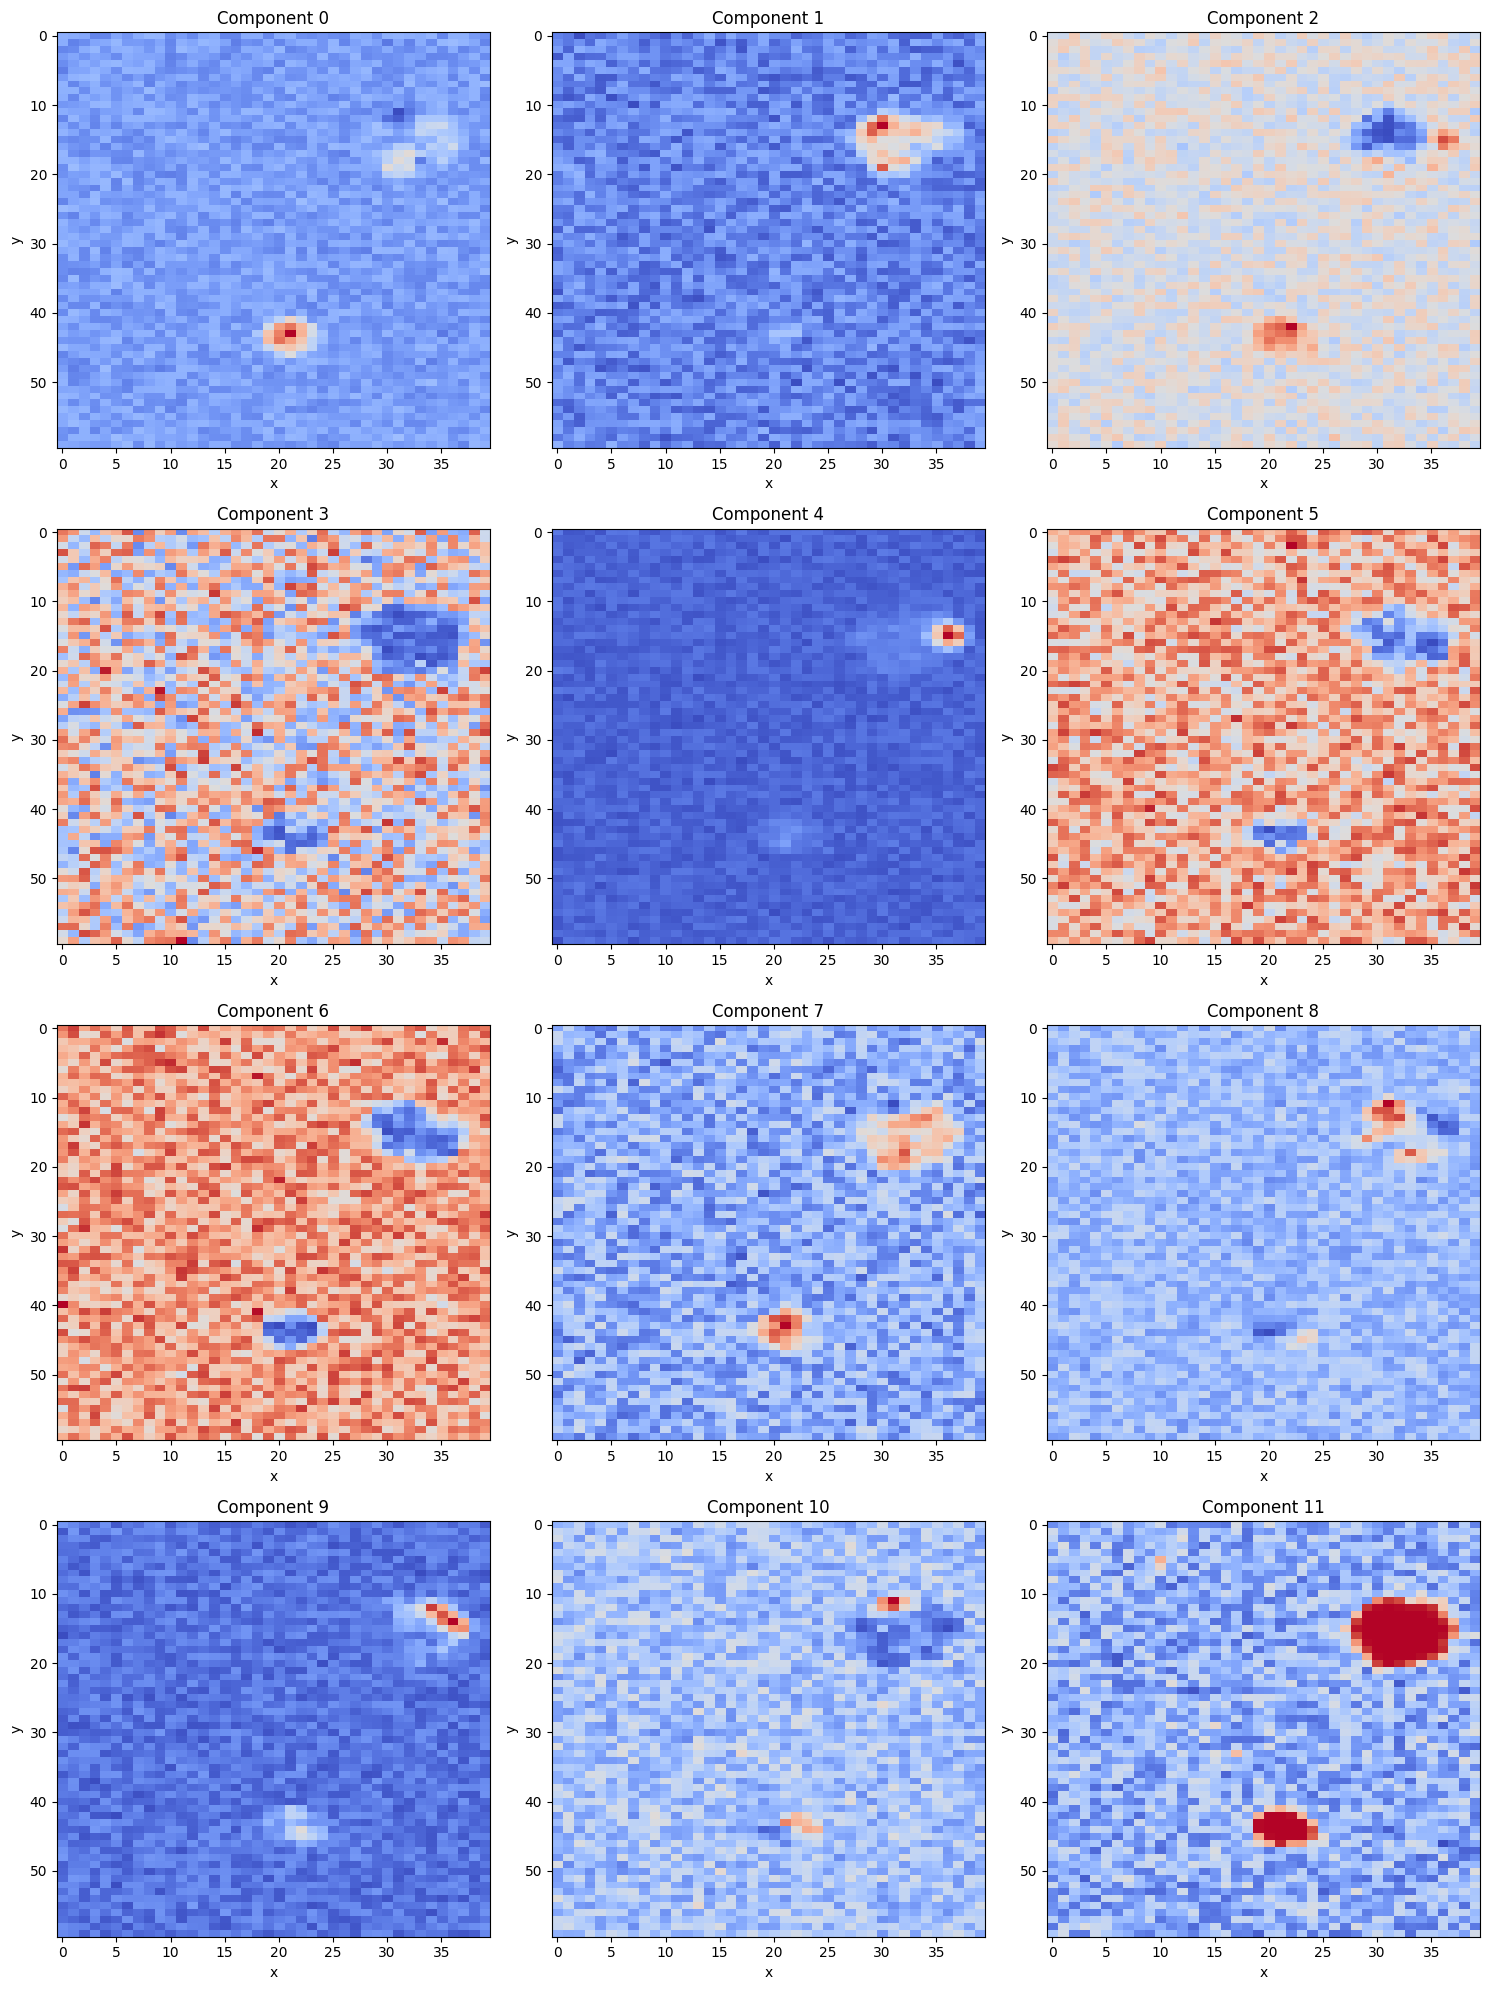

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def custom_component_plane(component, ax):
    # Reshape component data into the 2D grid
    component_data = weights[:, component].reshape(m, n)
    
    # Plot component plane on the provided axis
    im = ax.imshow(component_data, cmap="coolwarm", aspect="auto")
    ax.set_title(f"Component {component}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    return im

# Set up a grid of subplots
num_components = features_scaled.shape[1]
rows = (num_components + 2) // 3  # Choose 3 columns per row for better visibility
fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Flatten the axis array for easier iteration
axs = axs.flatten()

# Plot each component plane on the grid
for i in range(num_components):
    im = custom_component_plane(i, axs[i])

# Remove unused subplots (if any)
for j in range(num_components, len(axs)):
    axs[j].axis('off')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()



At each prinicipal component the two clusters appear, but not alays clear. The clearest they are on Component 11.